# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#3 observations of the data
#1. As shown in the Latitude vs. Max Temp scatter plot and regression lines, cities located near the equator are the hottest and cities get cooler the farther away from the equator they are.
#2. The regression analysis in Latitude vs. Wind Speed (Souther hemisphere) has a downward trend as cities get closer to the equator. High wind speed values at -30 to -50 seem to have the most outliers.
#3. In the latitude vs. cloudiness plots, it is hard to see a correlation. Many cities have 100% cloud cover or 0%.

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
from scipy.stats import linregress
import urllib
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
# Use weather Api url to retrieve data, Create query url using key
weather_api_key = 
base_url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{base_url}&appid={weather_api_key}&units={unit}&q="

# Create lists of each category needed
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

#Log being created showing data retrieval
print("---------------------")
print("Begin Retrieving Data")
print("-----------------------")

#Use for loop to loop through the cities found in cities list
for city in cities:
    
    #show loop through each city with url
    print(f"Processing Record {city}")
    print(query_url)
    
    #request data through json file and retrieve information needed. Append each category with the found information
    #Not all cities have all of the information required. Use try and except.
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
    
    # If city not found exclude the error message and skip to next city
    except:
        print("City NOT found. Skipping....")

#Show that all of the data has been retrieved
print("---------------------")
print("Data Retrieved")
print("---------------------")

---------------------
Begin Retrieving Data
-----------------------
Processing Record 29 of Set 13 | lhokseumawe
Processing Record 29 of Set 13 | rikitea
Processing Record 29 of Set 13 | hithadhoo
Processing Record 29 of Set 13 | huarmey
Processing Record 29 of Set 13 | chokurdakh
Processing Record 29 of Set 13 | south river
Processing Record 29 of Set 13 | camacha
Processing Record 29 of Set 13 | quatre cocos
Processing Record 29 of Set 13 | lavrentiya
Processing Record 29 of Set 13 | yellowknife
Processing Record 29 of Set 13 | severo-kurilsk
Processing Record 29 of Set 13 | pidvynohradiv
Processing Record 29 of Set 13 | katsuura
Processing Record 29 of Set 13 | mount isa
Processing Record 29 of Set 13 | palabuhanratu
City NOT found. Skipping....
Processing Record 29 of Set 13 | ribeira grande
Processing Record 29 of Set 13 | soyo
Processing Record 29 of Set 13 | cape town
Processing Record 29 of Set 13 | ilulissat
Processing Record 29 of Set 13 | libreville
Processing Record 29 of S

Processing Record 29 of Set 13 | varhaug
Processing Record 29 of Set 13 | bara
Processing Record 29 of Set 13 | comodoro rivadavia
Processing Record 29 of Set 13 | dzhebariki-khaya
Processing Record 29 of Set 13 | hami
Processing Record 29 of Set 13 | naco
Processing Record 29 of Set 13 | otane
Processing Record 29 of Set 13 | amahai
Processing Record 29 of Set 13 | saint-georges
Processing Record 29 of Set 13 | hamilton
Processing Record 29 of Set 13 | trinidad
Processing Record 29 of Set 13 | kavieng
Processing Record 29 of Set 13 | whitehorse
Processing Record 29 of Set 13 | saraland
Processing Record 29 of Set 13 | mantua
Processing Record 29 of Set 13 | sao filipe
Processing Record 29 of Set 13 | tiarei
Processing Record 29 of Set 13 | sitka
Processing Record 29 of Set 13 | husavik
Processing Record 29 of Set 13 | new norfolk
Processing Record 29 of Set 13 | san policarpo
Processing Record 29 of Set 13 | yaan
Processing Record 29 of Set 13 | rockport
Processing Record 29 of Set 13

Processing Record 29 of Set 13 | dayong
Processing Record 29 of Set 13 | saint george
Processing Record 29 of Set 13 | carnarvon
Processing Record 29 of Set 13 | zeerust
Processing Record 29 of Set 13 | plettenberg bay
Processing Record 29 of Set 13 | qaqortoq
Processing Record 29 of Set 13 | nayudupeta
Processing Record 29 of Set 13 | roura
Processing Record 29 of Set 13 | hastings
Processing Record 29 of Set 13 | bossembele
City NOT found. Skipping....
Processing Record 29 of Set 13 | vardo
Processing Record 29 of Set 13 | kuching
Processing Record 29 of Set 13 | grootfontein
Processing Record 29 of Set 13 | baykit
Processing Record 29 of Set 13 | amderma
City NOT found. Skipping....
Processing Record 29 of Set 13 | komsomolskiy
Processing Record 29 of Set 13 | attawapiskat
City NOT found. Skipping....
Processing Record 29 of Set 13 | pevek
Processing Record 29 of Set 13 | bethel
Processing Record 29 of Set 13 | verkhnevilyuysk
Processing Record 29 of Set 13 | ossora
Processing Recor

Processing Record 29 of Set 13 | sur
Processing Record 29 of Set 13 | hovd
Processing Record 29 of Set 13 | thinadhoo
Processing Record 29 of Set 13 | cabedelo
Processing Record 29 of Set 13 | altamira
Processing Record 29 of Set 13 | vao
Processing Record 29 of Set 13 | kisanga
Processing Record 29 of Set 13 | milyutinskaya
Processing Record 29 of Set 13 | necochea
Processing Record 29 of Set 13 | vallenar
Processing Record 29 of Set 13 | borup
Processing Record 29 of Set 13 | miraflores
Processing Record 29 of Set 13 | macaboboni
City NOT found. Skipping....
Processing Record 29 of Set 13 | urucui
Processing Record 29 of Set 13 | muriti
Processing Record 29 of Set 13 | glenn heights
Processing Record 29 of Set 13 | kazachinskoye
Processing Record 29 of Set 13 | kudahuvadhoo
Processing Record 29 of Set 13 | peddapalli
Processing Record 29 of Set 13 | sisimiut
Processing Record 29 of Set 13 | luderitz
Processing Record 29 of Set 13 | kasungu
Processing Record 29 of Set 13 | san vicente

NameError: name 'Print' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Format the lists into a dataframe with column names
weather_data = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Max Temp": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed":windSpeed,
                           "Lat": lat,
                           "Lng": lon,
                           "Date": date})
weather_data.count()

City          582
Country       582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Lat           582
Lng           582
Date          582
dtype: int64

In [70]:
#Show Weather DataFrame
weather_data

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Lat,Lng,Date
0,lhokseumawe,ID,81.48,71,88,2.55,5.1801,97.1507,1623203563
1,rikitea,PF,74.17,88,100,9.89,-23.1203,-134.9692,1623203563
2,hithadhoo,MV,82.69,72,10,6.60,-0.6000,73.0833,1623203563
3,huarmey,PE,66.56,83,90,7.76,-10.0681,-78.1522,1623203564
4,chokurdakh,RU,51.57,41,24,9.37,70.6333,147.9167,1623203564
...,...,...,...,...,...,...,...,...,...
577,karpogory,RU,50.13,54,46,3.29,64.0019,44.4451,1623203311
578,svetlyy,RU,53.65,89,14,6.44,54.6750,20.1347,1623203311
579,ippy,CF,69.15,96,98,0.45,6.2679,21.2247,1623203312
580,port hawkesbury,CA,70.72,60,1,2.30,45.6169,-61.3485,1623203312


In [75]:
weather_data.to_csv("../output_data/weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
#No cities that have humidity >100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

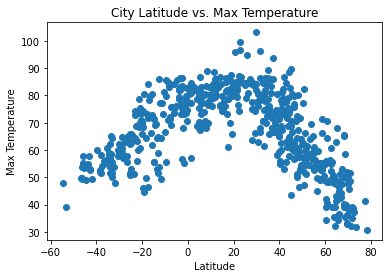

In [38]:
#Create Scatter plot showing relationship between latitude and Max Temp
plt.scatter(weather_data["Lat"],weather_data["Max Temp"])

# Show labels for axis and title
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.show()

#Observations: As the latitude gets closer to 0-20(around the equator) the Max Temp rises. It drops as the latitude increases in both directions

## Latitude vs. Humidity Plot

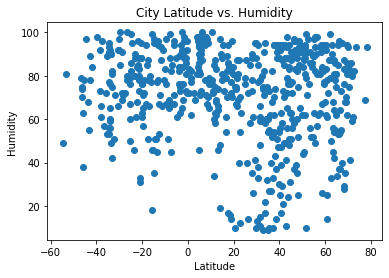

In [39]:
#Create Scatter plot showing relationship between latitude and humidity
plt.scatter(weather_data["Lat"],weather_data["Humidity"])

# Show labels for axis and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

# Hard to find any observations of latitude with humidity. It looks like around the latitude 20-40 there is not as many cities in the region with high humidity. 

## Latitude vs. Cloudiness Plot

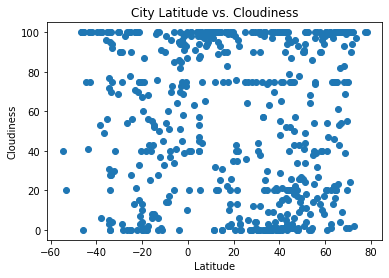

In [40]:
#Create Scatter plot showing relationship between latitude and cloudiness
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"])

# Show labels for axis and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

# There are many cities in the dataset that have little clouds or complete cloud coverage at this point.

## Latitude vs. Wind Speed Plot

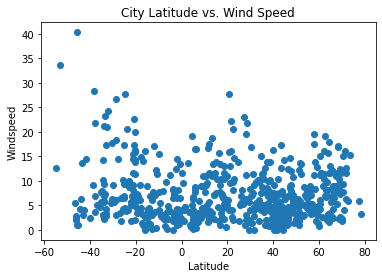

In [41]:
#Create Scatter plot showing relationship between latitude and Wind Speed
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"])

# Show labels for axis and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

plt.show()

# Wind Speed between -60 to 80 latitude are between 0 and 15 mph. Only a few cities in the plot above 25mph.

## Linear Regression

In [44]:
northern = weather_data.loc[weather_data["Lat"] > 0.0]

southern = weather_data.loc[weather_data["Lat"] < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

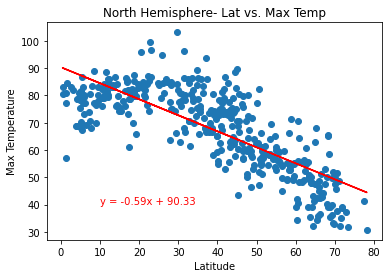

In [48]:
#Create x and y axis values
x_values = northern["Lat"]
y_values = northern["Max Temp"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,40), color="red")

# Create title and x,y labels
plt.title("North Hemisphere- Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.show()

#Describes the relationship between latitude and Max Temperature in Northern Hemisphere
# Shows as the latitude gets farther from the equator the temperature across cities decreases. Line shows this.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

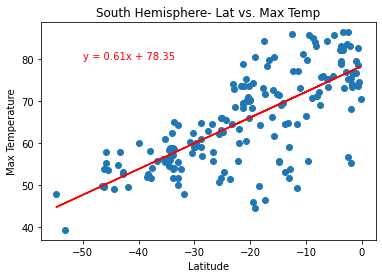

In [50]:
#Create x and y axis values
x_values = southern["Lat"]
y_values = southern["Max Temp"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,80), color="red")

# Create title and x,y labels
plt.title("South Hemisphere- Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.show()

#Describes the relationship between latitude and Max Temperature in Southern Hemisphere
#Likewise, as latitude gets closer to the equator in souther hemisphere, the temperature is also rising. Line signfies this.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

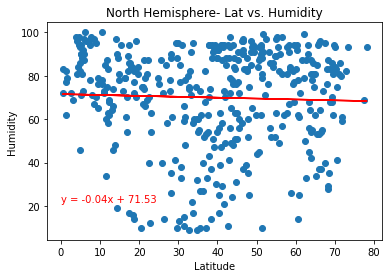

In [54]:
#Create x and y axis values
x_values = northern["Lat"]
y_values = northern["Humidity"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,22), color="red")

# Create title and x,y labels
plt.title("North Hemisphere- Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

#Describes the relationship between latitude and Humidity in Northern Hemisphere
# As shown by the regrssion lines, the humidity varies greatly. There are many cities across latitude that has high humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

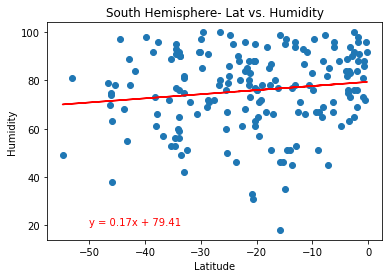

In [56]:
#Create x and y axis values
x_values = southern["Lat"]
y_values = southern["Humidity"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), color="red")

# Create title and x,y labels
plt.title("South Hemisphere- Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

#Describes the relationship between latitude and Humidity in Southern Hemisphere
# Similarly, this shows a slight upslope regression line with cities that vary greatly in humidity. Less cities have lower humidity, less cities close to -50 latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

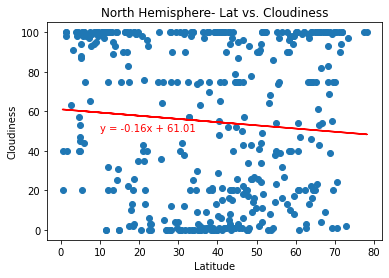

In [60]:
#Create x and y axis values
x_values = northern["Lat"]
y_values = northern["Cloudiness"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,50), color="red")

# Create title and x,y labels
plt.title("North Hemisphere- Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

#Describes the relationship between latitude and Cloudiness in Northern Hemisphere
# Hard to see relationship with lat vs cloudiness. Many cities covered by clouds, many cities have no clouds. The farther away from the equator, the less amount of clouds

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

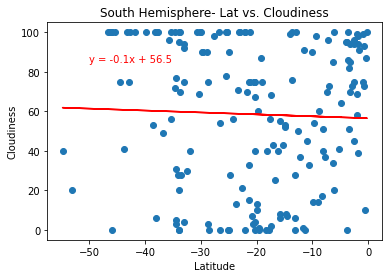

In [63]:
#Create x and y axis values
x_values = southern["Lat"]
y_values = southern["Cloudiness"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,85), color="red")

# Create title and x,y labels
plt.title("South Hemisphere- Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

#Describes the relationship between latitude and Cloudiness in Southern Hemisphere
# Slight down trend of regression line as cities get closer to equator.  Less clouds as cities get closer to the equator?

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

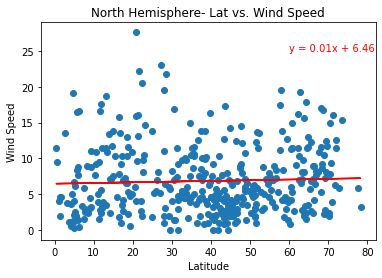

In [66]:
#Create x and y axis values
x_values = northern["Lat"]
y_values = northern["Wind Speed"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,25), color="red")

# Create title and x,y labels
plt.title("North Hemisphere- Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

#Describes the relationship between latitude and Wind Speed in Northern Hemisphere
# Slight up trend of wind as cities get farther from 0 latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

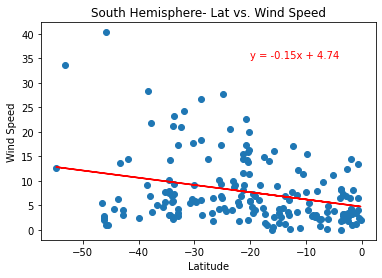

In [68]:
#Create x and y axis values
x_values = southern["Lat"]
y_values = southern["Wind Speed"]

#get the values of regression line and show line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create scatter plot using x and y values, show line equation in plot with regression line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,35), color="red")

# Create title and x,y labels
plt.title("South Hemisphere- Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

#Describes the relationship between latitude and Wind Speed in Southern Hemisphere
#SLight down trend of wind speed as cities get closer to the equator.